In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import re


In [5]:
df_game=pd.read_csv('raw_data/games.csv')
df_game.shape
df_game.info()
df_game.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


#NUll Vales find or nan nat 

In [6]:
import numpy as np

df_game.replace(['N/A', 'NA', '-', '?', 'missing', 'null', 'None', ''], np.nan, inplace=True)

cols_with_nulls = ['Release Date', 'Team', 'Rating', 'Summary']

df_game = df_game.dropna(subset=cols_with_nulls)

# Check resulting shape (rows, columns)
print(df_game.shape)

# Optional: reset index for clean downstream use
df_game = df_game.reset_index(drop=True)


(1498, 14)


In [7]:
for i in df_game.columns:
    df_game = df_game.dropna(subset=[i])




In [8]:
df_game.isna().sum()


Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

#duplicate to find


In [9]:
df_game['Title'].duplicated().sum()
# df_game[df_game['Title'].duplicated(keep=False)]



np.int64(413)

In [10]:
df_game['Rating'].isna().sum()

# # Get rows with missing release dates
isnat = pd.to_datetime(df_game['Release Date'], errors='coerce').isna()
df_game[isnat]



,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
643,644,Deltarune,releases on TBD,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1.3K,83,468,617
1241,1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


In [11]:
df_game['Release Date'] = pd.to_datetime(df_game['Release Date'], format="%b %d, %Y", errors="coerce")
df_game.head(2)
df_game = df_game[df_game['Release Date'].notna()]      # here i remove all date col which not have date in it



In [12]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496 entries, 0 to 1497
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1496 non-null   int64         
 1   Title              1496 non-null   object        
 2   Release Date       1496 non-null   datetime64[ns]
 3   Team               1496 non-null   object        
 4   Rating             1496 non-null   float64       
 5   Times Listed       1496 non-null   object        
 6   Number of Reviews  1496 non-null   object        
 7   Genres             1496 non-null   object        
 8   Summary            1496 non-null   object        
 9   Reviews            1496 non-null   object        
 10  Plays              1496 non-null   object        
 11  Playing            1496 non-null   object        
 12  Backlogs           1496 non-null   object        
 13  Wishlist           1496 non-null   object        
dtypes: datetime64

remove duplicate

In [13]:
df_game.duplicated().sum()   #none
df_game.T.duplicated().sum()
df_game=df_game.drop('Times Listed',axis=1)



In [14]:
df_game.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


In [15]:
df_game['Title'].duplicated().sum()


np.int64(413)

In [16]:
# df_game = df_game.drop_duplicates(subset=['Title', 'Release Date'])
df_game = df_game.drop_duplicates(subset=['Title' ])

df_game[df_game.duplicated(subset=['Title','Release Date','Plays'	], keep=False)]




,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [17]:
df_game.shape


(1083, 13)

In [18]:
# df_game = df_game.drop_duplicates(subset=['Title', 'Release Date', 'Reviews'])


In [19]:
df_game.duplicated().sum()   #none
df_game.T.duplicated().sum()





np.int64(0)

In [20]:
df_game.shape

(1083, 13)

In [21]:
def clean_reviews_column(df, col_name="Reviews", join_reviews=True):
    """
    Clean a column that contains list-like strings of reviews.
    
    Args:
        df (pd.DataFrame): Your dataframe
        col_name (str): Column name containing reviews
        join_reviews (bool): 
            True = join all reviews into one string per row
            False = keep as list (explodable)
    
    Returns:
        pd.DataFrame: with cleaned reviews
    """
    def clean_text(text):
        # Lowercase
        text = text.lower()
        # Remove newlines and tabs
        text = re.sub(r'\s+', ' ', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s,.]', '', text)
        return text.strip()
    
    def process_row(row):
        try:
            # Convert string -> Python list
            reviews = ast.literal_eval(row)
            # Clean each review
            cleaned = [clean_text(r) for r in reviews]
            return " ".join(cleaned) if join_reviews else cleaned
        except:
            return None
    
    df[col_name] = df[col_name].apply(process_row)
    return df


In [22]:
df_game.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


In [23]:
df_game = clean_reviews_column(df_game, col_name="Reviews", join_reviews=True)
print(df_game[['Title','Reviews']].head(1))


        Title                                            Reviews
0  Elden Ring  the first playthrough of elden ring is one of ...


In [24]:
df_game.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...,17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21K,3.2K,6.3K,3.6K


In [25]:
import ast
import re
import pandas as pd

def clean_text_columns(
    df, 
    list_columns=None,    # columns that contain list-like strings (e.g. Reviews, Teams, Genres)
    text_columns=None,    # columns with plain sentences (e.g. Summary)
    join_lists=True,      # True = join lists into single string, False = keep as list
    keep_punct=True       # True = keep commas and periods, False = strip all punctuation
):
    """
    Cleans text and list-like string columns in a dataframe.
    
    Args:
        df (pd.DataFrame): input dataframe
        list_columns (list): list of column names containing list-like strings
        text_columns (list): list of column names containing plain text
        join_lists (bool): if True, join list values into one string per row
        keep_punct (bool): if True, keep commas and periods, else remove all punctuation
        
    Returns:
        pd.DataFrame: cleaned dataframe
    """
    
    # Regex depending on punctuation preference
    if keep_punct:
        regex_pattern = r"[^\w\s,.]"   # keep commas + periods
    else:
        regex_pattern = r"[^\w\s]"     # remove all punctuation

    def clean_text(text):
        if not isinstance(text, str):
            return text
        text = text.strip()
        text = re.sub(r"\s+", " ", text)         # normalize whitespace
        text = re.sub(regex_pattern, "", text)   # clean punctuation
        return text

    # Handle list-like columns
    if list_columns:
        for col in list_columns:
            def process_row(row):
                try:
                    values = ast.literal_eval(row) if isinstance(row, str) else row
                    cleaned = [clean_text(str(x)).lower() for x in values if x]
                    return " ".join(cleaned) if join_lists else cleaned
                except:
                    return None
            df[col] = df[col].apply(process_row)

    # Handle plain text columns
    if text_columns:
        for col in text_columns:
            df[col] = df[col].astype(str).apply(clean_text)
    
    return df


In [26]:

df_game['Team'] = df_game['Team'].apply(
    lambda x: " , ".join(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else x)


In [27]:

df_game['Genres'] = df_game['Genres'].apply(
    lambda x: " , ".join(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else x)


In [28]:
df_game.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,"Bandai Namco Entertainment , FromSoftware",4.5,3.9K,"Adventure , RPG","Elden Ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...,17K,3.8K,4.6K,4.8K
1,1,Hades,2019-12-10,Supergiant Games,4.3,2.9K,"Adventure , Brawler , Indie , RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21K,3.2K,6.3K,3.6K


In [29]:
def parse_k(val):
    if isinstance(val, str) and 'K' in val:
        return float(val.replace('K', '')) * 1000
    return float(val) if isinstance(val, str) else val

In [30]:
df_game['Number of Reviews'] = df_game['Number of Reviews'].apply(parse_k)
df_game['Plays'] = df_game['Plays'].apply(parse_k)
df_game['Playing'] = df_game['Playing'].apply(parse_k)
df_game['Backlogs'] = df_game['Backlogs'].apply(parse_k)
df_game['Wishlist'] = df_game['Wishlist'].apply(parse_k)
df_game['Title'] = df_game['Title'].str.lower().str.strip()

In [31]:
df_game.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,elden ring,2022-02-25,"Bandai Namco Entertainment , FromSoftware",4.5,3900.0,"Adventure , RPG","Elden Ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,1,hades,2019-12-10,Supergiant Games,4.3,2900.0,"Adventure , Brawler , Indie , RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0


In [32]:
# Normalize case and strip extra spaces
text_cols=['Genres']
for col in text_cols:
    df_game[col] = df_game[col].astype(str).str.strip().str.title()


In [33]:
df_game.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [34]:
def bayesian_average(rating, num_reviews, C, m):
    return (num_reviews * rating + m * C) / (num_reviews + m)

C = df_game['Rating'].mean()  # Global average rating
m = df_game['Number of Reviews'].median()  # Median number of reviews as threshold

df_game['weighted_rating'] = df_game.apply(lambda row: bayesian_average(row['Rating'], row['Number of Reviews'], C, m), axis=1)

# Top 10 by weighted rating
top_rated = df_game.sort_values('weighted_rating', ascending=False).head(10)
top_rated

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,weighted_rating
0,0,elden ring,2022-02-25,"Bandai Namco Entertainment , FromSoftware",4.5,3900.0,"Adventure , Rpg","Elden Ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0,4.413173
43,43,outer wilds,2019-05-28,"Mobius Digital , Annapurna Interactive",4.6,1800.0,"Adventure , Indie , Puzzle , Simulator",Outer Wilds is a critically-acclaimed and awar...,"replayed with my girlfriend, still the best ga...",7700.0,661.0,4800.0,3100.0,4.412133
14,14,bloodborne,2015-03-24,"FromSoftware , Sony Computer Entertainment",4.5,3400.0,"Adventure , Rpg",An action RPG in which the player embodies a H...,"im not trying to brag, but bloodborne wasnt mu...",17000.0,1100.0,5600.0,3300.0,4.401885
50,50,silent hill 2,2001-09-24,"Team Silent , Konami",4.5,2200.0,"Adventure , Puzzle","The second entry in the Silent Hill franchise,...",you know a game is that good when even the tan...,8600.0,282.0,2900.0,2100.0,4.357389
66,66,chrono trigger,1995-03-11,Square,4.5,1900.0,"Adventure , Rpg","In this turn-based Japanese RPG, young Crono m...","rivetting story, great graphics and music, an ...",9100.0,518.0,4900.0,2200.0,4.339152
2,2,the legend of zelda: breath of the wild,2017-03-03,"Nintendo , Nintendo EPD Production Group No. 3",4.4,4300.0,"Adventure , Rpg",The Legend of Zelda: Breath of the Wild is the...,this game is the game that is not csgo that i ...,30000.0,2500.0,5000.0,2600.0,4.329888
28,28,disco elysium: the final cut,2020-05-01,ZA/UM,4.6,1100.0,"Adventure , Indie , Rpg",Disco Elysium: The Final Cut is a groundbreaki...,a captivating journey from start to finish. th...,6000.0,1200.0,5000.0,2700.0,4.327070
139,139,disco elysium,2019-10-15,ZA/UM,4.6,1100.0,"Adventure , Rpg , Turn Based Strategy","A CRPG in which, waking up in a hotel room a t...",i really enjoyed this one. the story is super ...,4000.0,478.0,2800.0,1900.0,4.327070
99,99,mother 3,2006-04-20,"HAL Laboratory , Nintendo",4.5,1600.0,"Rpg , Turn Based Strategy",A turn-based JRPG and sequel to EarthBound (19...,you need to play this game. dont wait for nint...,5700.0,287.0,3600.0,1900.0,4.315567
128,128,metal gear solid 3: snake eater,2004-11-17,"Konami Computer Entertainment Japan , Konami",4.5,1500.0,"Adventure , Shooter , Tactical",Metal Gear Solid 3: Snake Eater is the prequel...,best game in the entire series. kojima você é ...,9200.0,118.0,2400.0,1300.0,4.306090


In [35]:
df_game.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist', 'weighted_rating'],
      dtype='object')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_4820\2946290354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, y='Title', x='weighted_rating', palette='viridis')


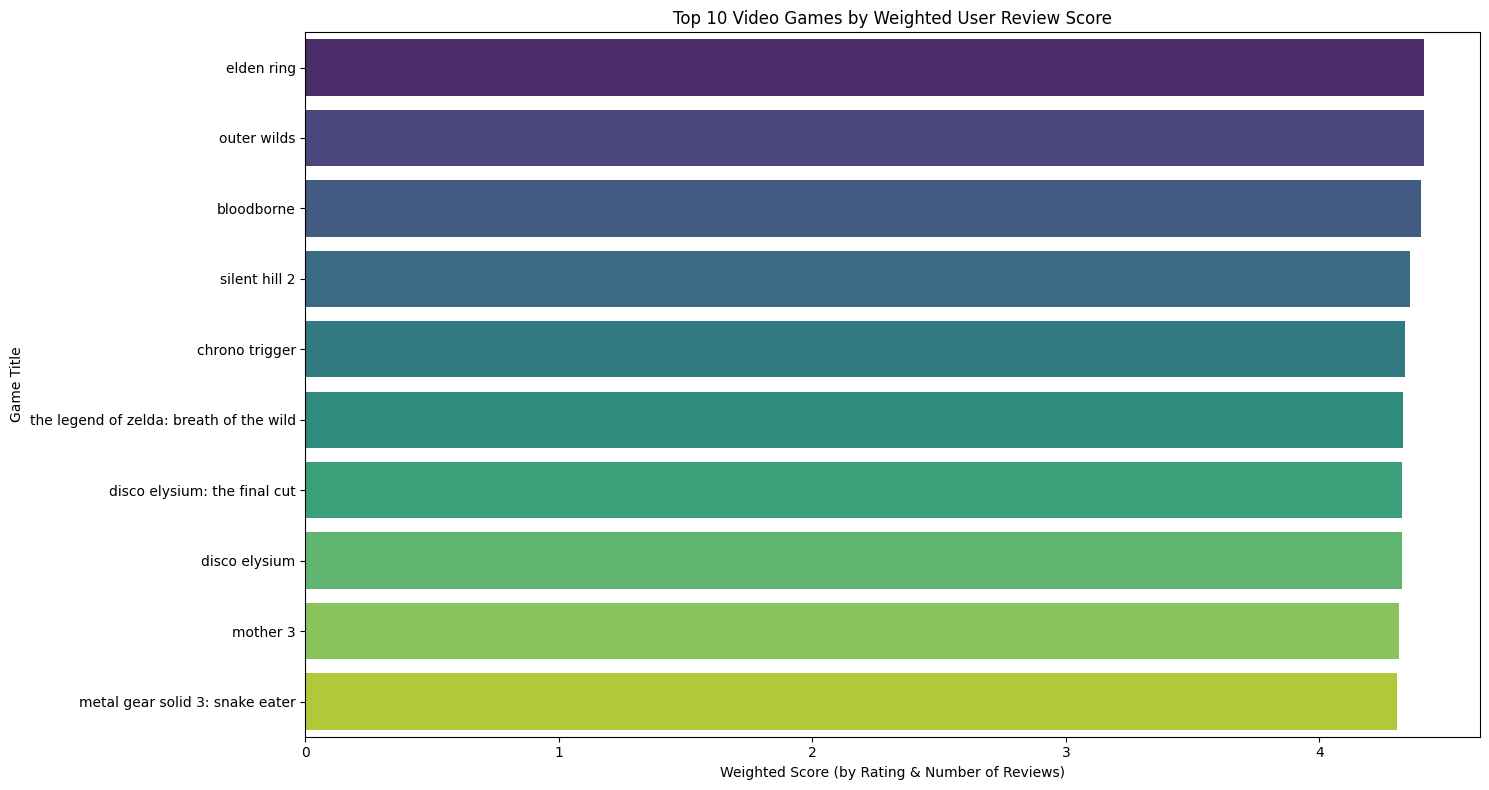

In [36]:

plt.figure(figsize=(15, 8))
top_rated = top_rated.drop_duplicates('Title').head(10)
sns.barplot(data=top_rated, y='Title', x='weighted_rating', palette='viridis')
plt.xlabel('Weighted Score (by Rating & Number of Reviews)')
plt.ylabel('Game Title')
plt.title('Top 10 Video Games by Weighted User Review Score')
plt.tight_layout()
plt.show()

Which developers (Teams) have the highest average ratings?

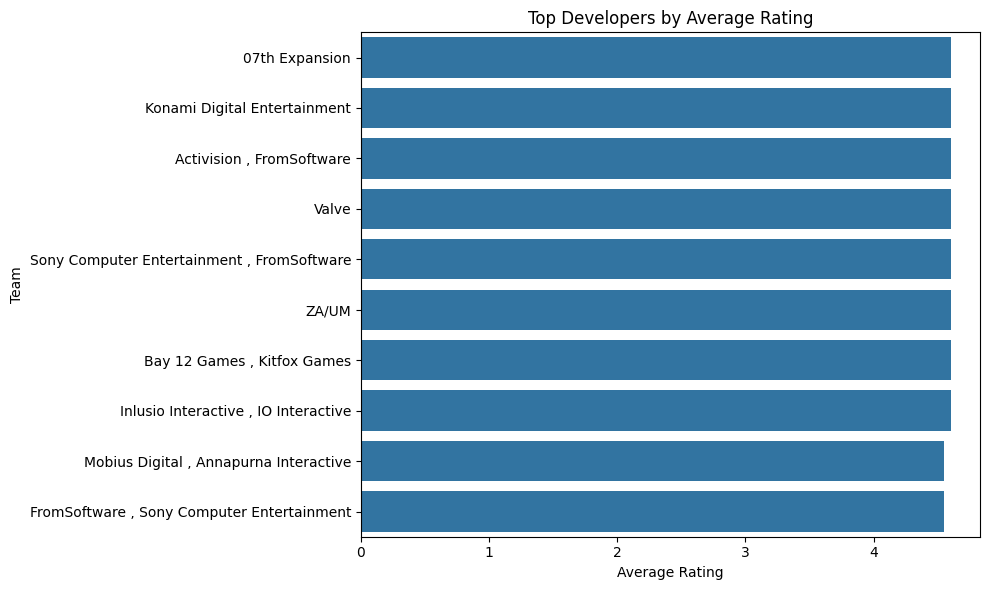

In [37]:
team_avg_rating = df_game.groupby('Team').agg({'Rating': 'mean', 'Title':'count'}).sort_values('Rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=team_avg_rating.index.astype(str), x=team_avg_rating['Rating'])
plt.title("Top Developers by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

What are the most common genres in the dataset?

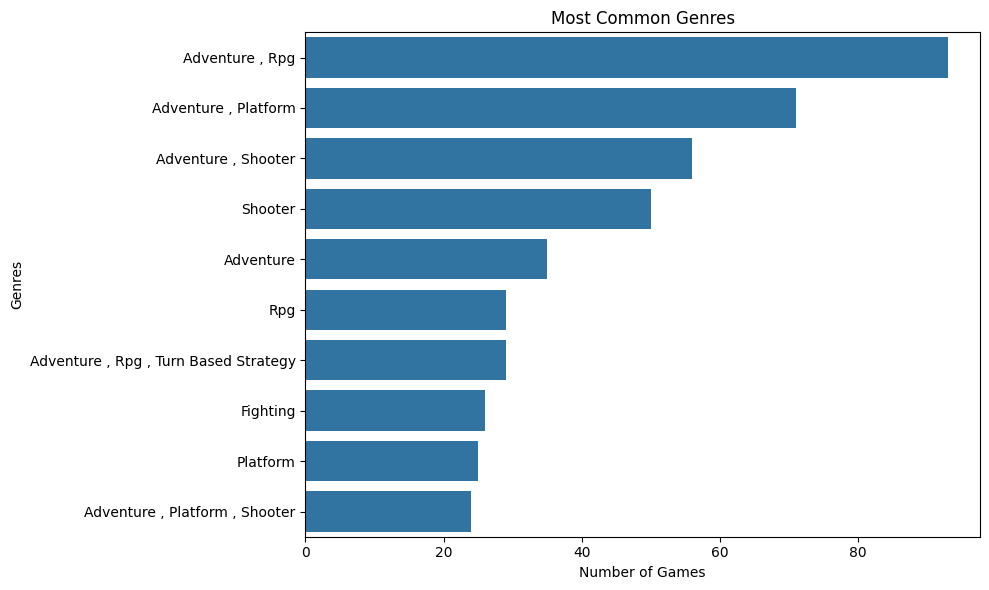

In [38]:
genre_counts = df_game['Genres'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=genre_counts.index.astype(str), x=genre_counts.values)
plt.title("Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()

4. Games with highest backlog/wishlist ratio

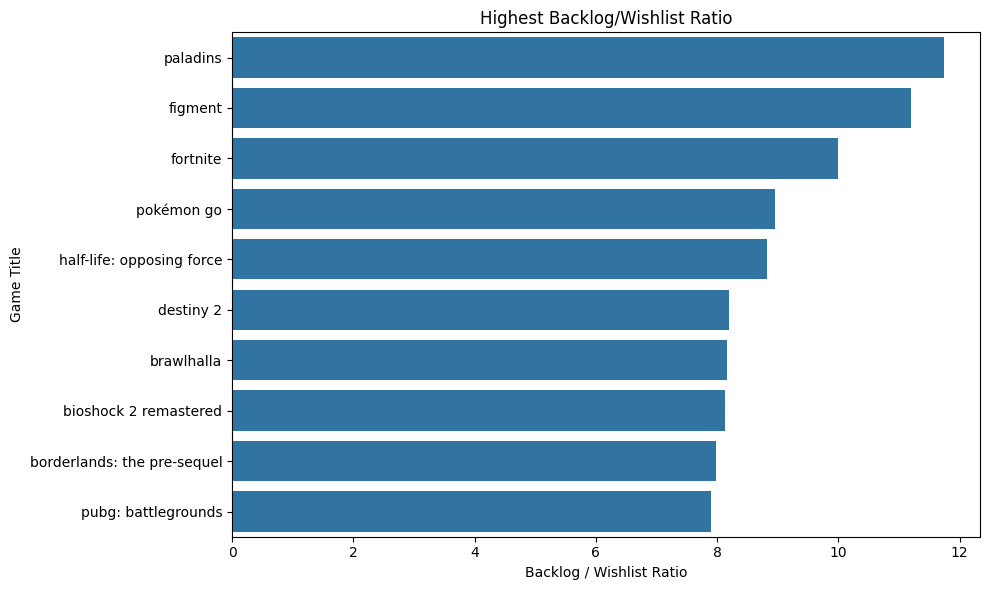

In [39]:
df_game['Backlog_Wishlist_Ratio'] = df_game['Backlogs'] / df_game['Wishlist'].replace(0, pd.NA)
highest_ratio = df_game.sort_values('Backlog_Wishlist_Ratio', ascending=False).drop_duplicates('Title').head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=highest_ratio['Title'], x=highest_ratio['Backlog_Wishlist_Ratio'])
plt.title("Highest Backlog/Wishlist Ratio")
plt.xlabel("Backlog / Wishlist Ratio")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

5. Game release trend across years

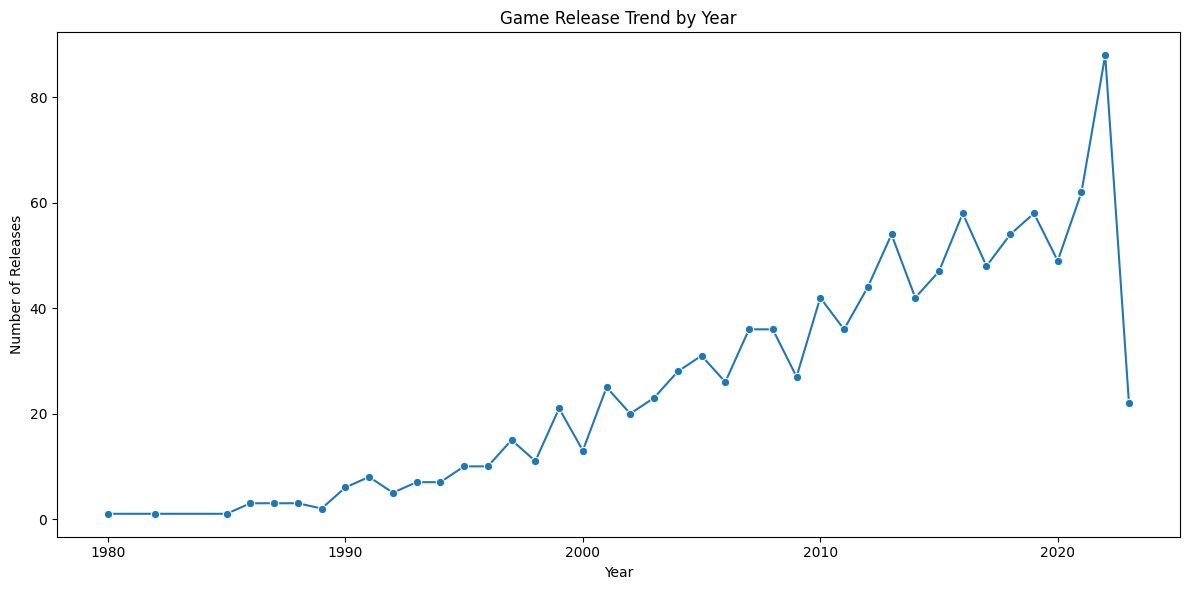

In [40]:
df_game['Release_Year'] = pd.to_datetime(df_game['Release Date'], errors='coerce').dt.year
release_year_trend = df_game['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=release_year_trend.index, y=release_year_trend.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Game Release Trend by Year")
plt.tight_layout()
plt.show()

 Distribution of user ratings

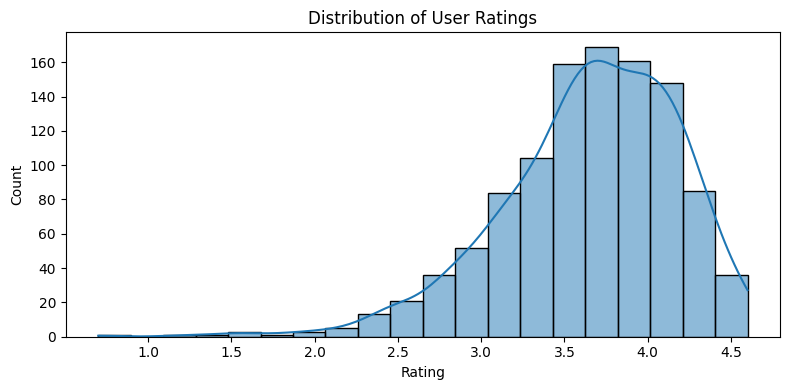

In [41]:
plt.figure(figsize=(8,4))
sns.histplot(df_game['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.title("Distribution of User Ratings")
plt.tight_layout()
plt.show()

7. Top 10 most wishlisted games

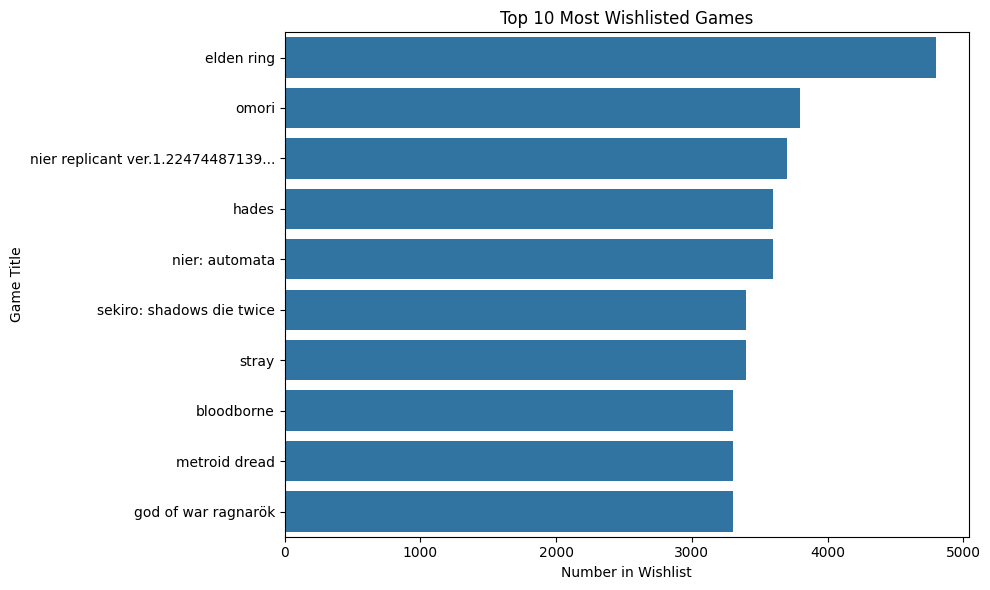

In [42]:
most_wishlisted = df_game.sort_values('Wishlist', ascending=False).drop_duplicates('Title').head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=most_wishlisted['Title'], x=most_wishlisted['Wishlist'])
plt.title("Top 10 Most Wishlisted Games")
plt.xlabel("Number in Wishlist")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

# 8. Average number of plays per genre

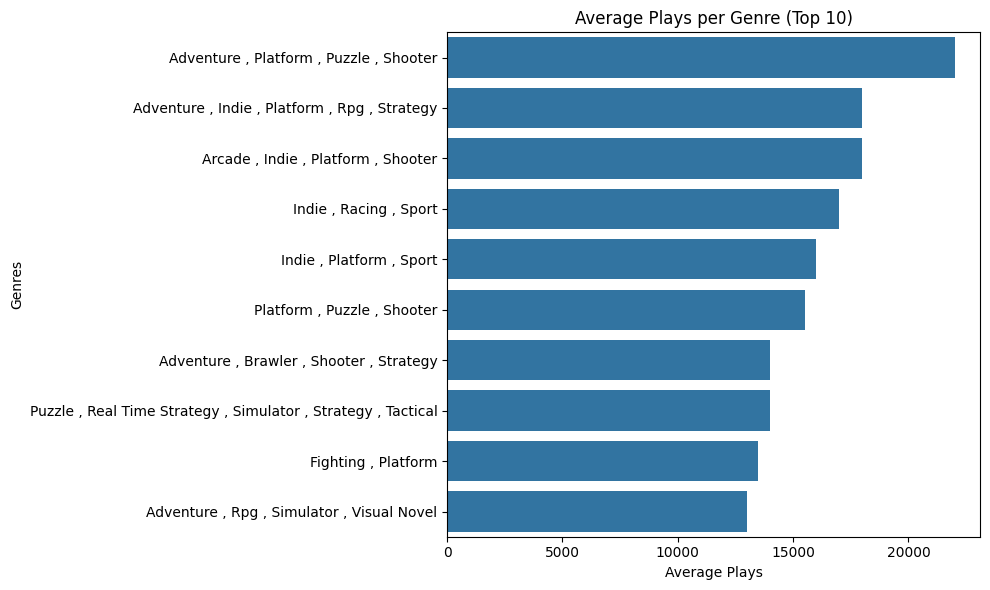

In [43]:
genre_play_avg = df_game.groupby('Genres')['Plays'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=genre_play_avg.index.astype(str), x=genre_play_avg.values)
plt.title("Average Plays per Genre (Top 10)")
plt.xlabel("Average Plays")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()

# 9. Most productive & impactful studios

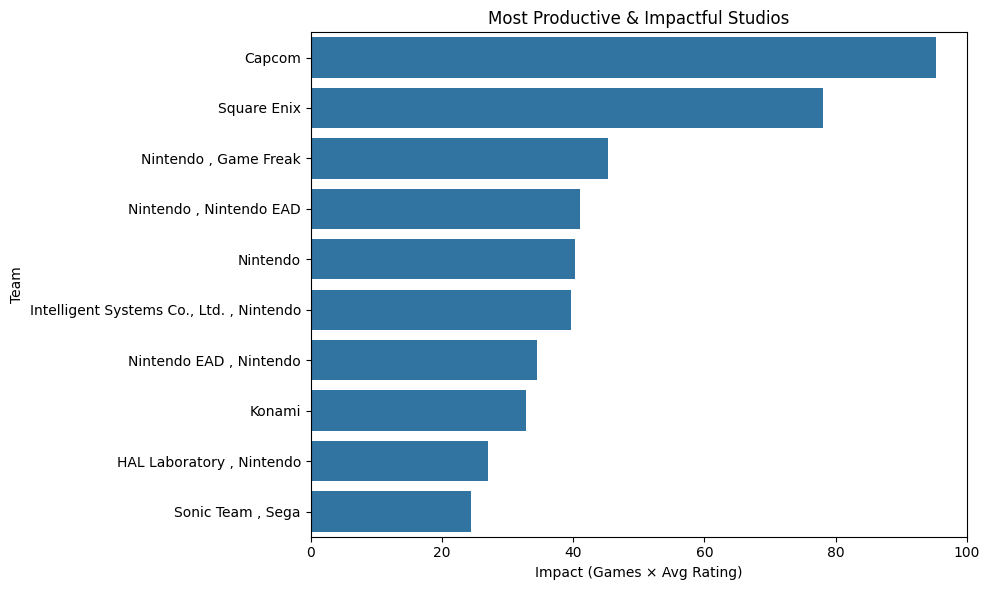

In [44]:
studio_stats = df_game.groupby('Team').agg({'Title':'count', 'Rating':'mean'})
studio_stats['Impact'] = studio_stats['Title'] * studio_stats['Rating']
most_impactful = studio_stats.sort_values('Impact', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=most_impactful.index.astype(str), x=most_impactful['Impact'])
plt.title("Most Productive & Impactful Studios")
plt.xlabel("Impact (Games × Avg Rating)")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

# sales

In [45]:
df_sales=pd.read_csv('raw_data/vgsales.csv')
df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Null values

In [46]:
df_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [47]:
df_sales=df_sales.dropna(subset='Year')

In [48]:
df_sales.isnull().sum()


Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

# duplicate remove

In [49]:
df_sales.duplicated().sum()
df_sales.T.duplicated().sum()


np.int64(0)

In [50]:
# Normalize case and strip extra spaces
text_cols = ['Platform','Publisher']
for col in text_cols:
    df_sales[col] = df_sales[col].astype(str).str.strip().str.title()


10. Which region generates the most game sales?

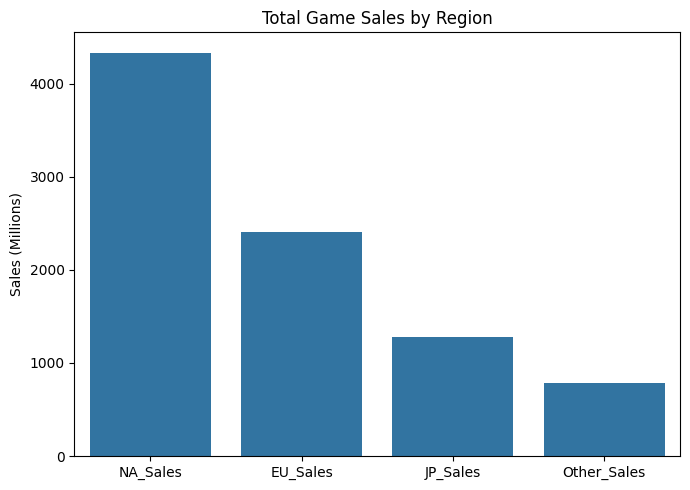

In [51]:
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
total_region_sales = {col: df_sales[col].sum() for col in region_cols}
plt.figure(figsize=(7,5))
sns.barplot(x=list(total_region_sales.keys()), y=list(total_region_sales.values()))
plt.title('Total Game Sales by Region')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

Best-selling platforms

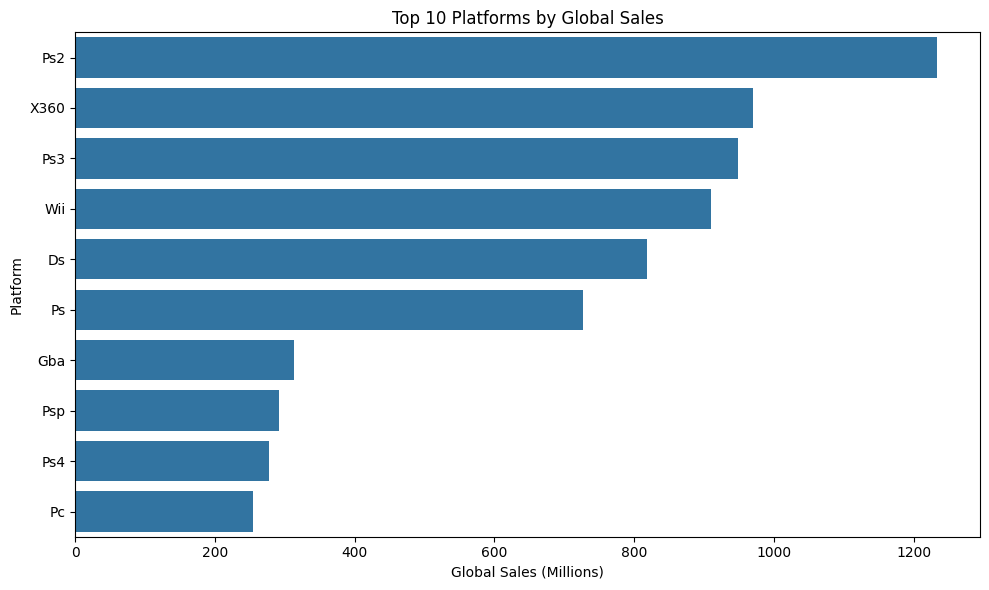

In [52]:
platform_sales = df_sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=platform_sales.index, x=platform_sales.values)
plt.title('Top 10 Platforms by Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

 12. Trend of game releases and sales over years

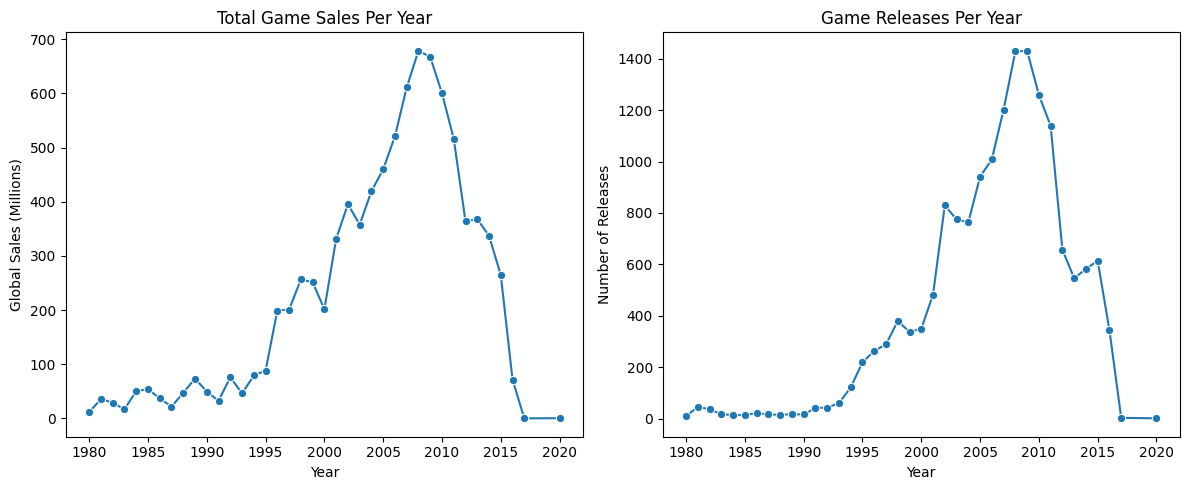

In [53]:
year_sales = df_sales.groupby('Year')['Global_Sales'].sum()
year_releases = df_sales['Year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(x=year_sales.index, y=year_sales.values, marker='o')
plt.title('Total Game Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.subplot(1,2,2)
sns.lineplot(x=year_releases.index, y=year_releases.values, marker='o')
plt.title('Game Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.show()

13. Top publishers by sales


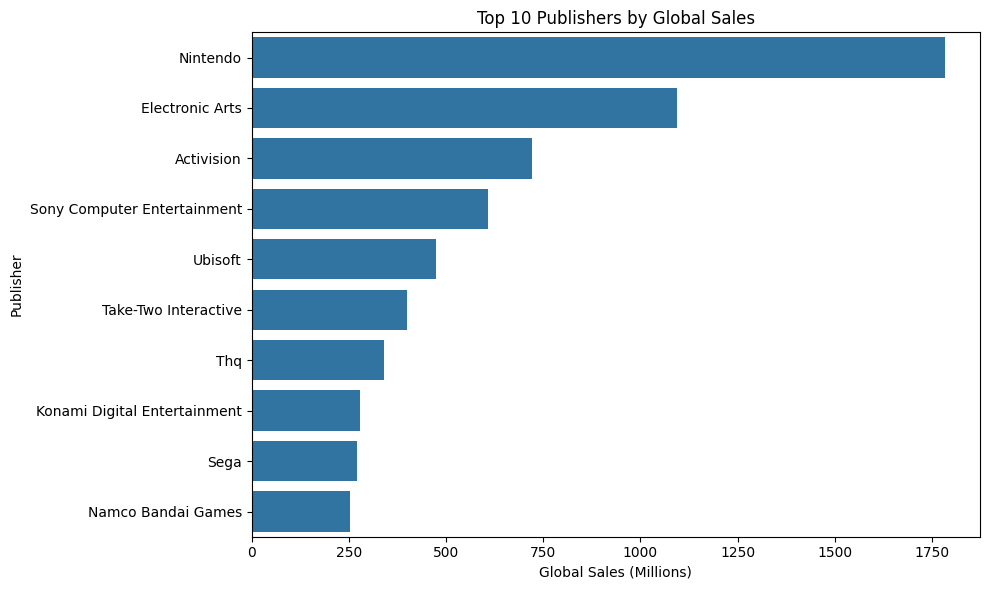

In [54]:
publisher_sales = df_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=publisher_sales.index, x=publisher_sales.values)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


14. Top 10 best-selling games globally


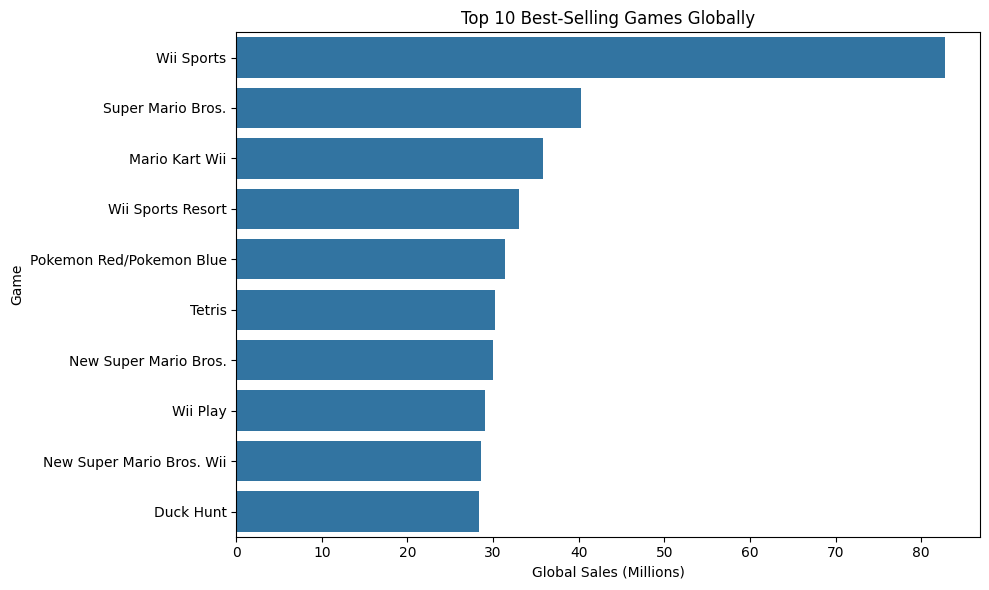

In [55]:
top10_games = df_sales.sort_values('Global_Sales', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top10_games['Name'], x=top10_games['Global_Sales'])
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game')
plt.tight_layout()
plt.show()

 15. Regional sales comparison for platforms


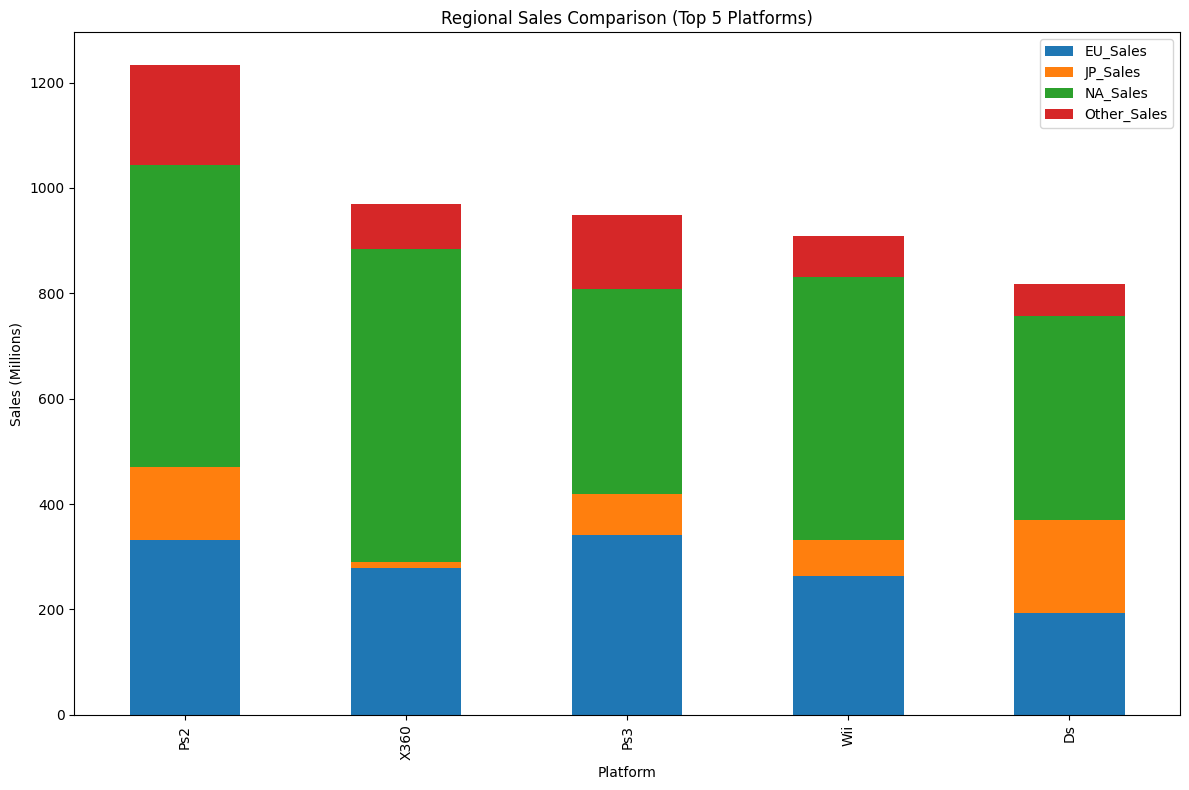

In [56]:
pivot = df_sales.pivot_table(index='Platform', values=region_cols, aggfunc='sum')
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).head(5).index]
pivot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Regional Sales Comparison (Top 5 Platforms)')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()


# 16. Market evolution by platform over time


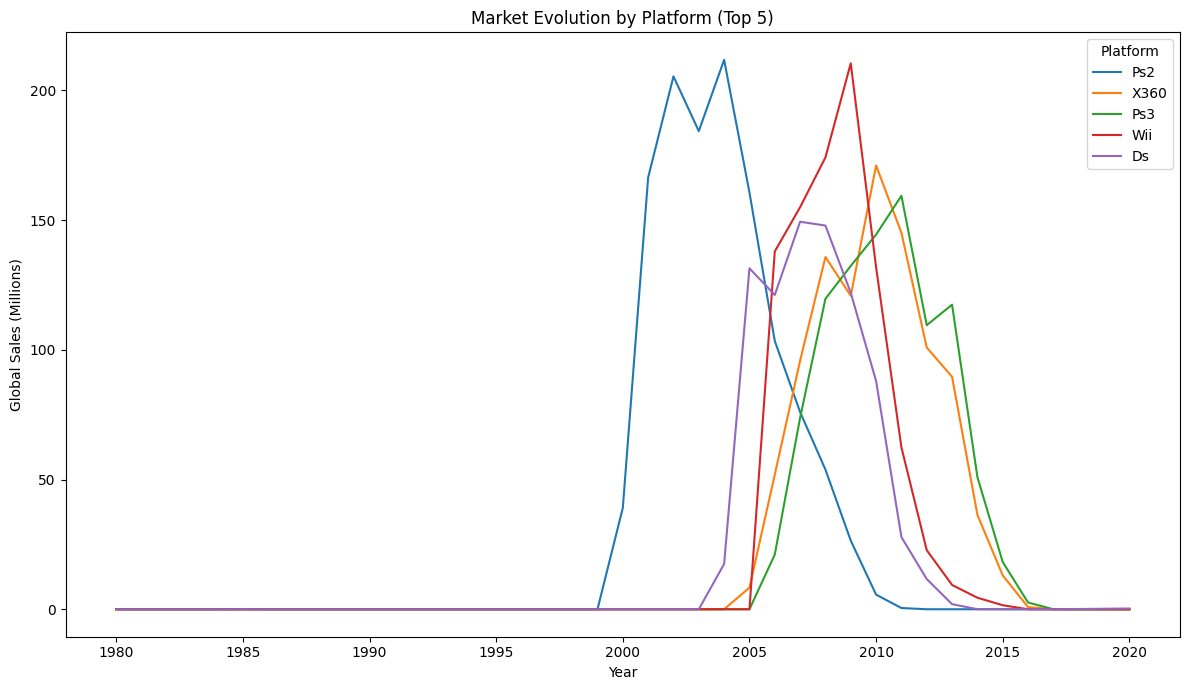

In [57]:
platform_year_sales = df_sales.groupby(['Year','Platform'])['Global_Sales'].sum().unstack().fillna(0)
top5_platforms = platform_year_sales.sum().sort_values(ascending=False).head(5).index
platform_year_sales[top5_platforms].plot(figsize=(12,7))
plt.title('Market Evolution by Platform (Top 5)')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

# 17. Regional genre preferences


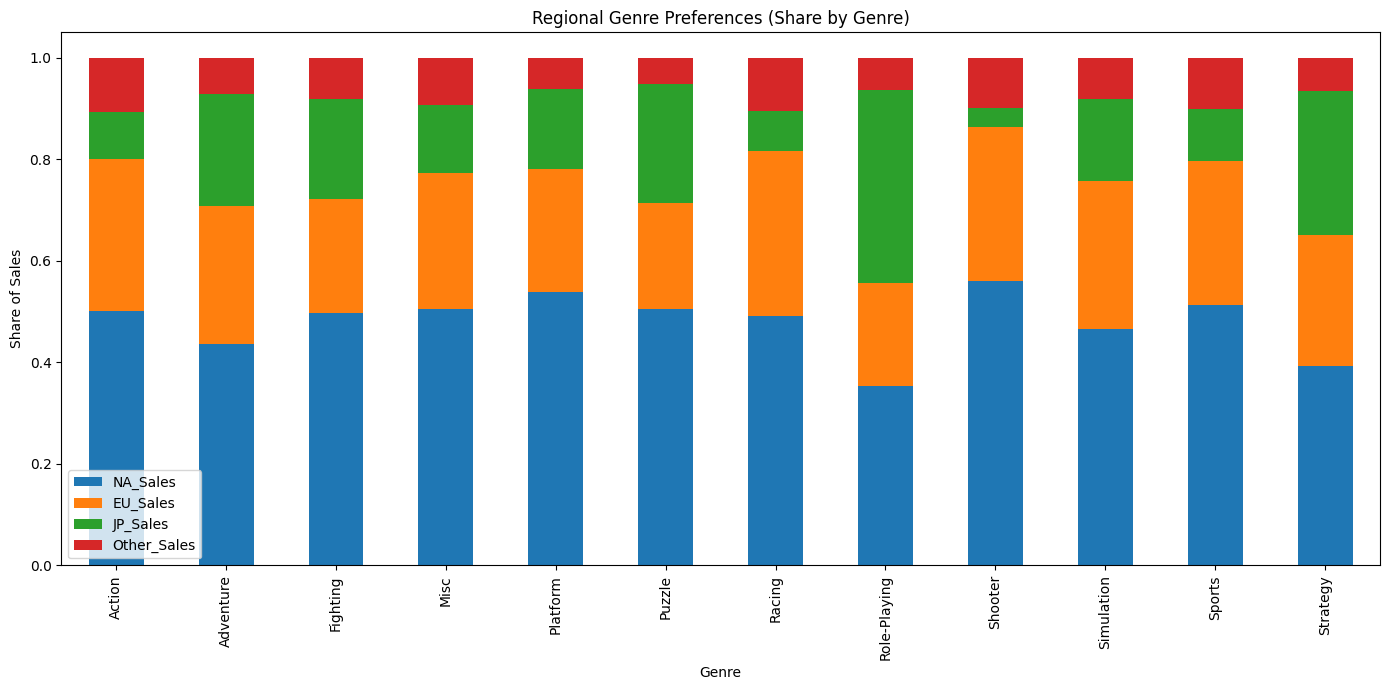

In [58]:
genre_region_sales = df_sales.groupby(['Genre'])[region_cols].sum()
genre_region_sales_norm = genre_region_sales.div(genre_region_sales.sum(axis=1), axis=0)
genre_region_sales_norm.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Regional Genre Preferences (Share by Genre)')
plt.ylabel('Share of Sales')
plt.tight_layout()
plt.show()

 18. Yearly sales change per region


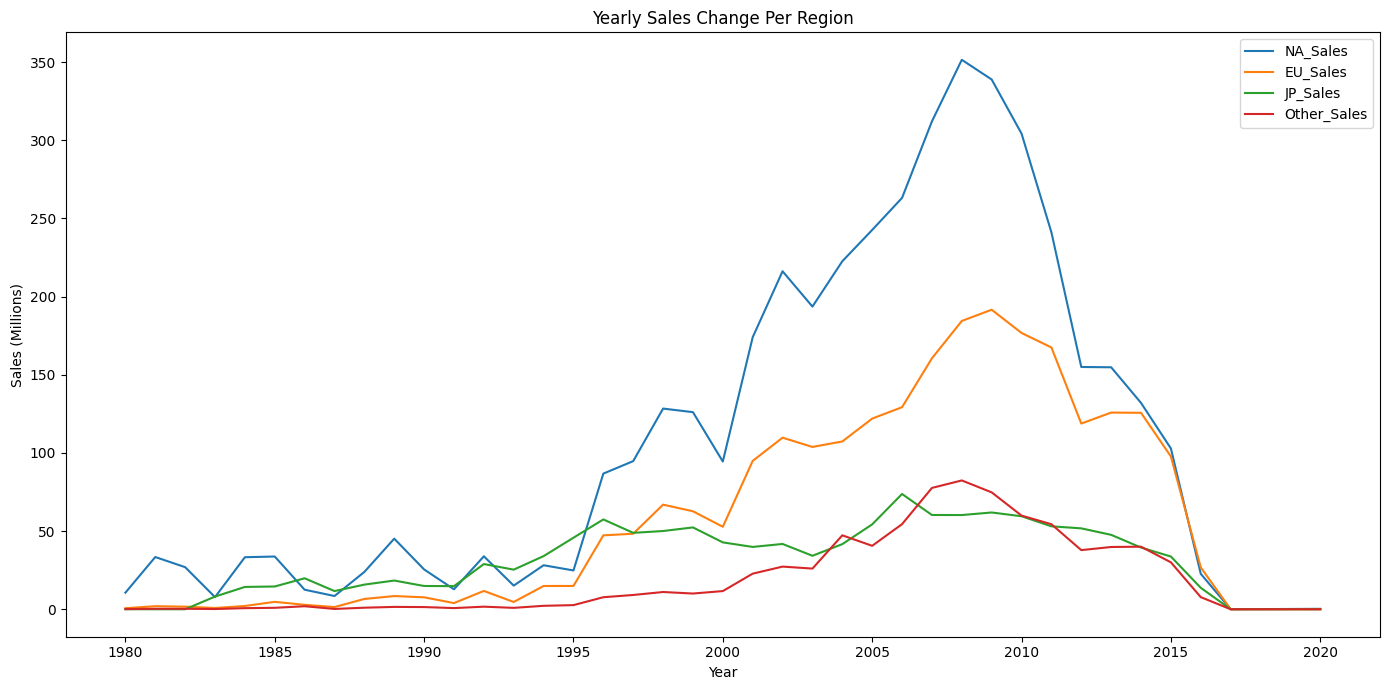

In [59]:
year_region_sales = df_sales.groupby('Year')[region_cols].sum()
year_region_sales.plot(figsize=(14,7))
plt.title('Yearly Sales Change Per Region')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

# 19. Average sales per publisher


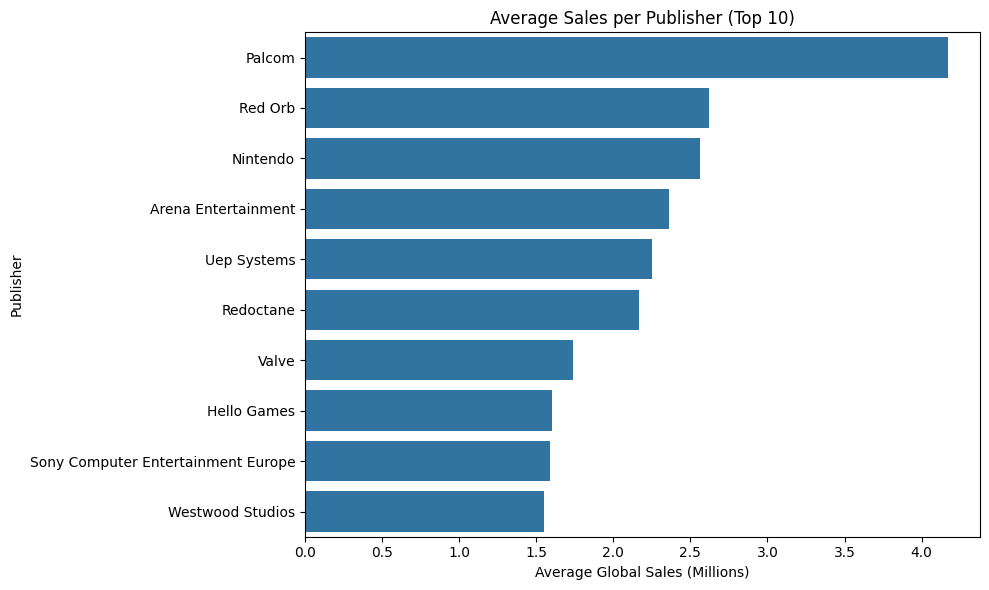

In [60]:
avg_sales_publisher = df_sales.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=avg_sales_publisher.index, x=avg_sales_publisher.values)
plt.title('Average Sales per Publisher (Top 10)')
plt.xlabel('Average Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# 20. Top 5 best-selling games per platform


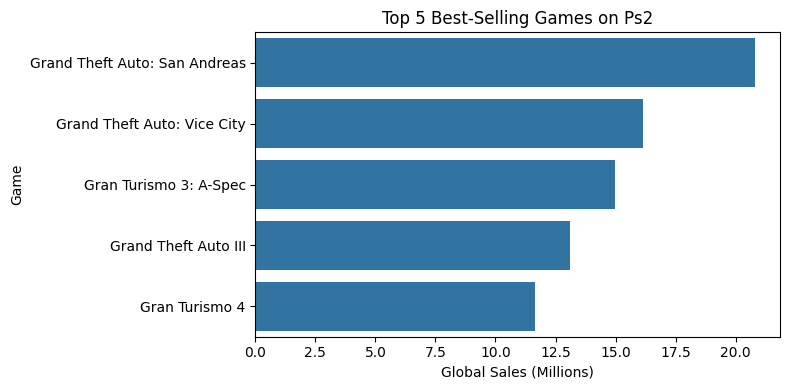

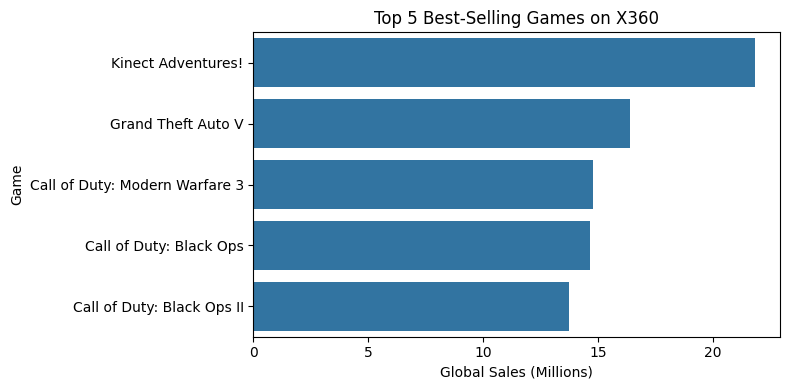

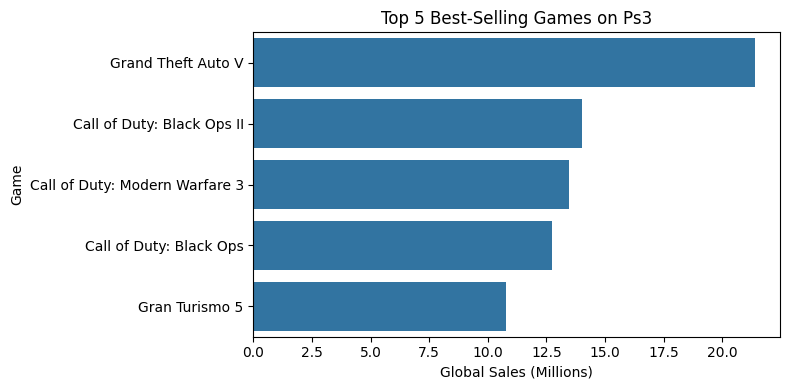

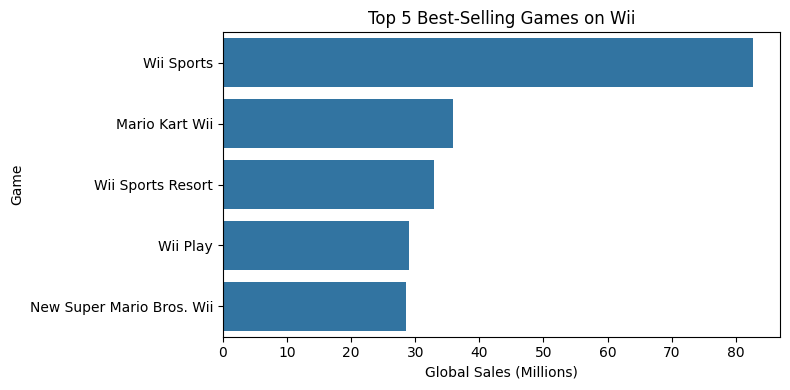

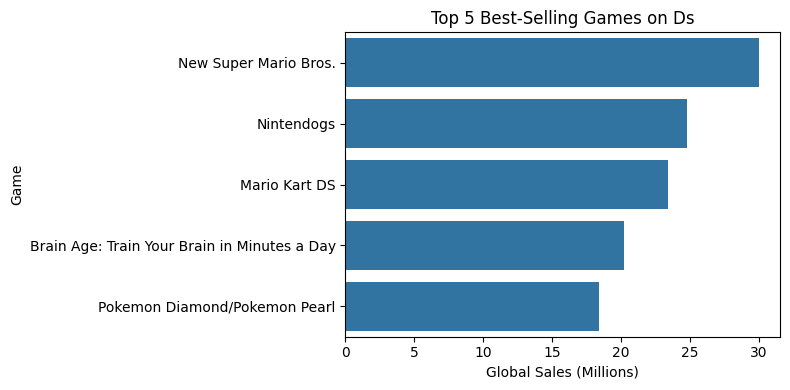

In [61]:
for plat in top5_platforms:
    plat_games = df_sales[df_sales['Platform'] == plat].sort_values('Global_Sales', ascending=False).head(5)
    plt.figure(figsize=(8,4))
    sns.barplot(y=plat_games['Name'], x=plat_games['Global_Sales'])
    plt.title(f'Top 5 Best-Selling Games on {plat}')
    plt.xlabel('Global Sales (Millions)')
    plt.ylabel('Game')
    plt.tight_layout()
    plt.show()

Merge Both

In [62]:
df_sales['Name'] = df_sales['Name'].str.lower().str.strip()
df_game['Title'] = df_game['Title'].str.lower().str.strip()
df_merged = pd.merge(df_sales, df_game, left_on='Name', right_on='Title', how='inner')
df_merged.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,weighted_rating,Backlog_Wishlist_Ratio,Release_Year
0,1,wii sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,"Simulator , Sport",Bowl like a pro or go for that home run...\n ...,the perfect arcade game. another type of game ...,18000.0,39.0,320.0,93.0,3.683170,3.440860,2006
1,2,super mario bros.,Nes,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,"Adventure , Platform",A side scrolling 2D platformer and first entry...,"i actually had no idea this game was so long, ...",18000.0,59.0,733.0,237.0,3.535278,3.092827,1985


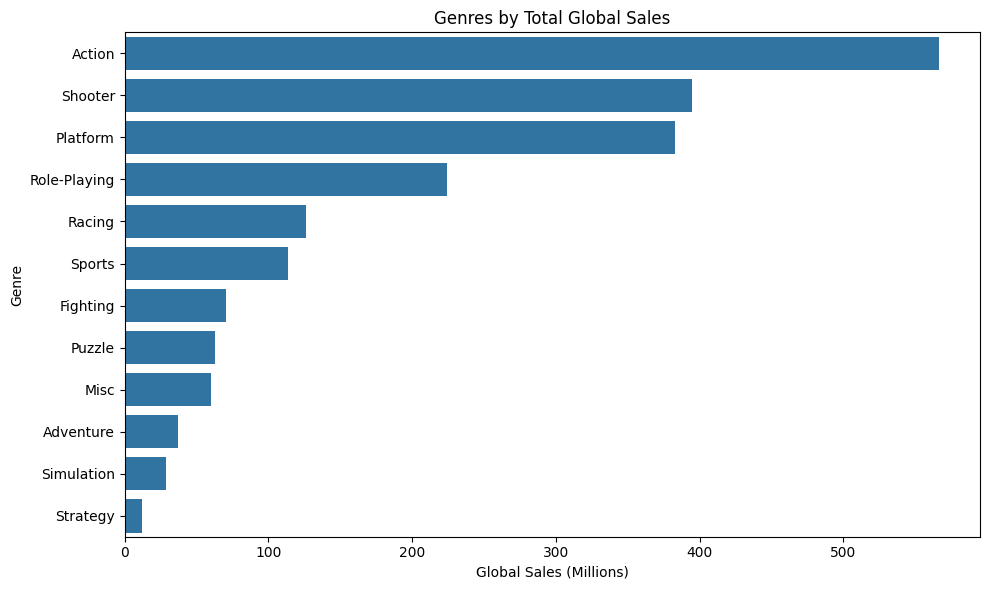

In [63]:
genre_sales = df_merged.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=genre_sales.index, x=genre_sales.values)
plt.title('Genres by Total Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 22. How does user rating affect global sales?


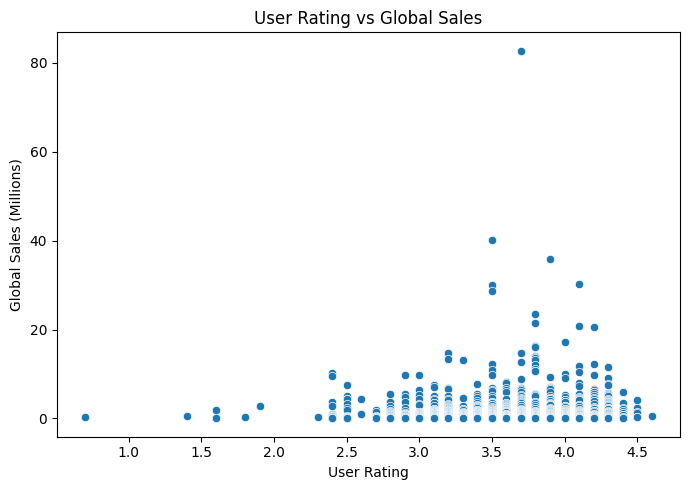

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_merged['Rating'], y=df_merged['Global_Sales'])
plt.title('User Rating vs Global Sales')
plt.xlabel('User Rating')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

# 23. Platforms with most games above rating 4


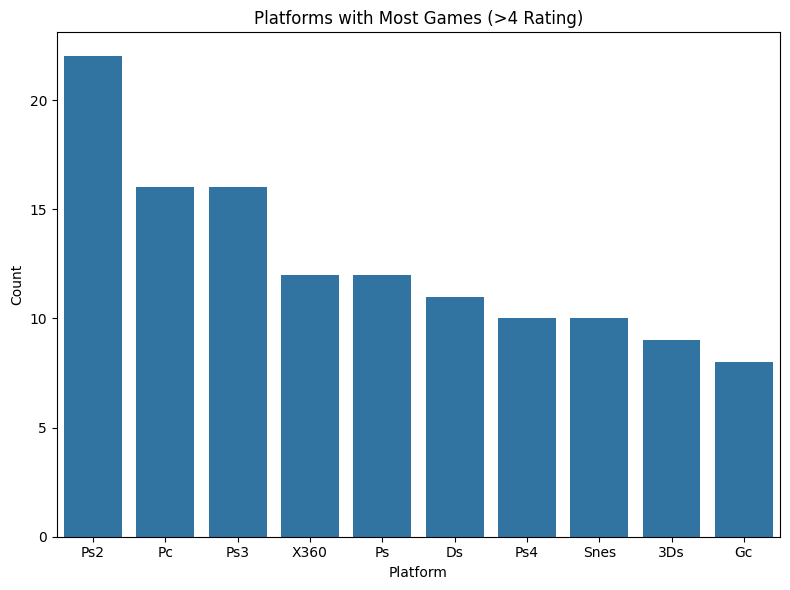

In [65]:
high_rating = df_merged[df_merged['Rating'] > 4]
plat_high_rating = high_rating['Platform'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=plat_high_rating.index, y=plat_high_rating.values)
plt.title('Platforms with Most Games (>4 Rating)')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 24. Trend of releases and sales over time

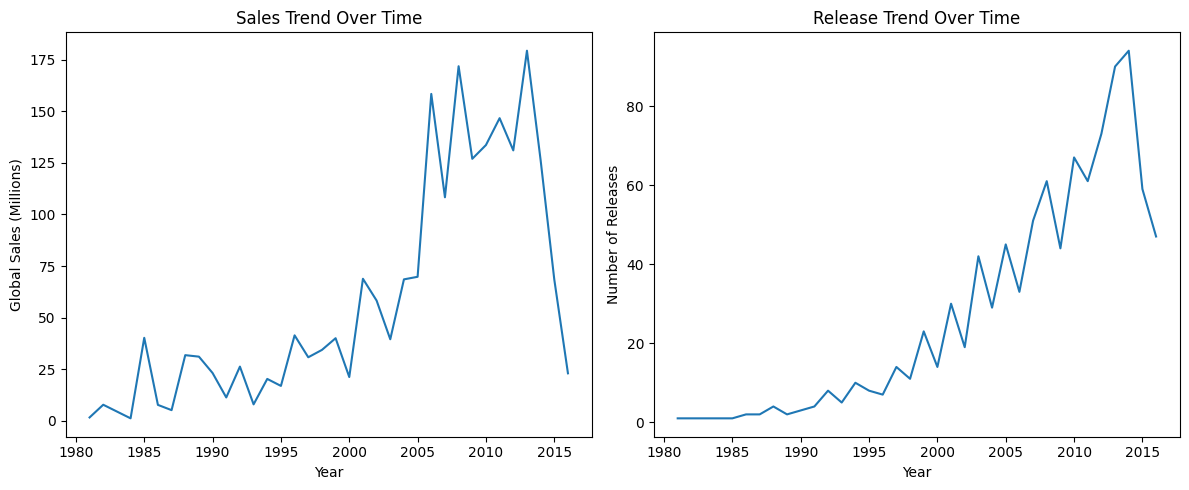

In [66]:
if 'Year' in df_merged.columns:
    year_sales = df_merged.groupby('Year')['Global_Sales'].sum()
    year_releases = df_merged['Year'].value_counts().sort_index()
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.lineplot(x=year_sales.index, y=year_sales.values)
    plt.title('Sales Trend Over Time')
    plt.xlabel('Year')
    plt.ylabel('Global Sales (Millions)')
    plt.subplot(1,2,2)
    sns.lineplot(x=year_releases.index, y=year_releases.values)
    plt.title('Release Trend Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Releases')
    plt.tight_layout()
    plt.show()

# 25. Do highly wishlisted games lead to more sales?


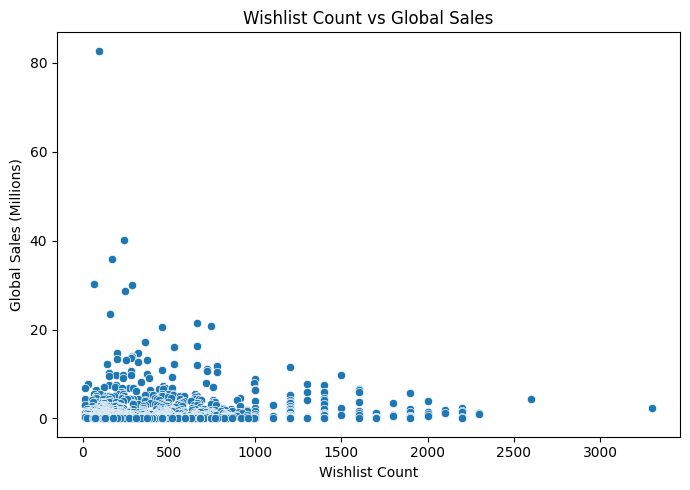

In [67]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_merged['Wishlist'], y=df_merged['Global_Sales'])
plt.title('Wishlist Count vs Global Sales')
plt.xlabel('Wishlist Count')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

# 26. Genres with high engagement but low sales


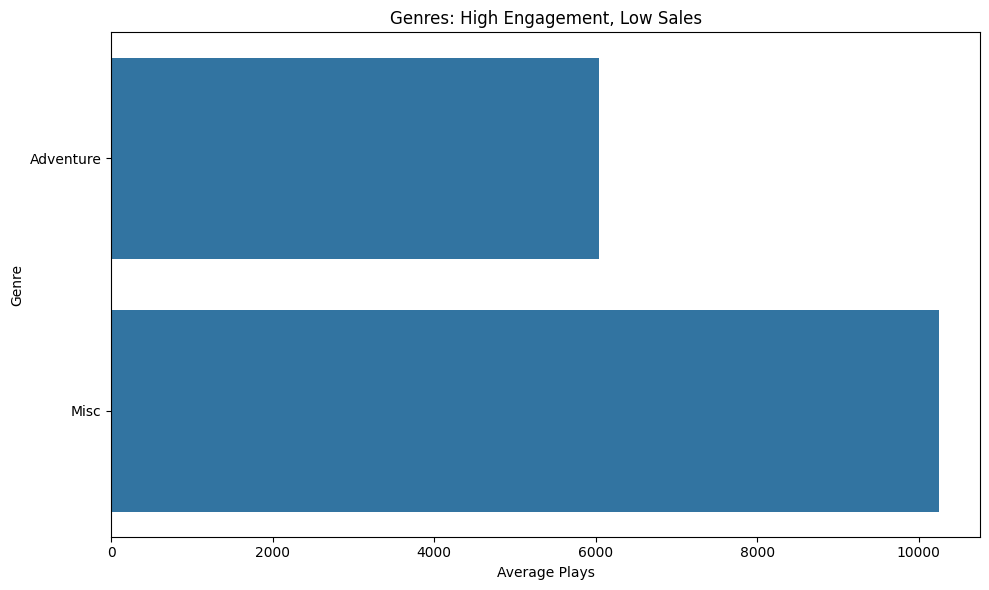

In [68]:
engagement = df_merged.groupby('Genre')['Plays'].mean()
low_sales = genre_sales[genre_sales < genre_sales.median()]
high_engage = engagement[engagement > engagement.median()]
interesting_genres = high_engage.index.intersection(low_sales.index)
plt.figure(figsize=(10,6))
sns.barplot(y=interesting_genres, x=engagement[interesting_genres])
plt.title('Genres: High Engagement, Low Sales')
plt.xlabel('Average Plays')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 27. Correlation between wishlists/backlogs and rating


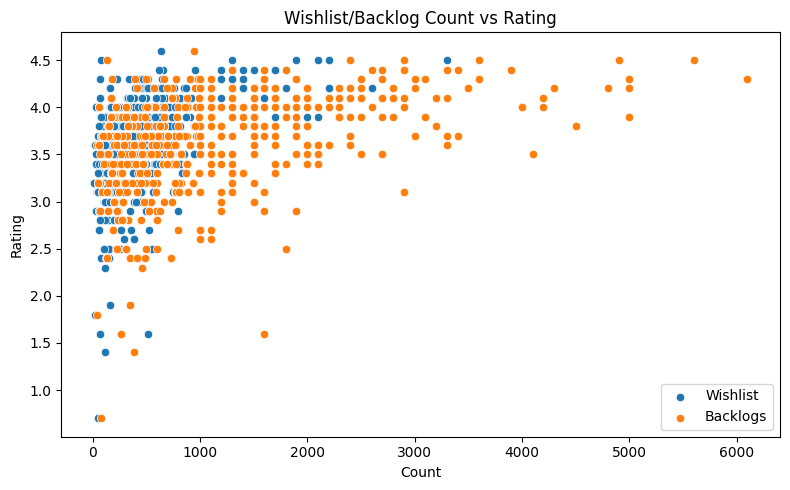

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_merged['Wishlist'], y=df_merged['Rating'], label='Wishlist')
sns.scatterplot(x=df_merged['Backlogs'], y=df_merged['Rating'], label='Backlogs')
plt.title('Wishlist/Backlog Count vs Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.legend()
plt.show()

# 28. How does user engagement differ across genres?


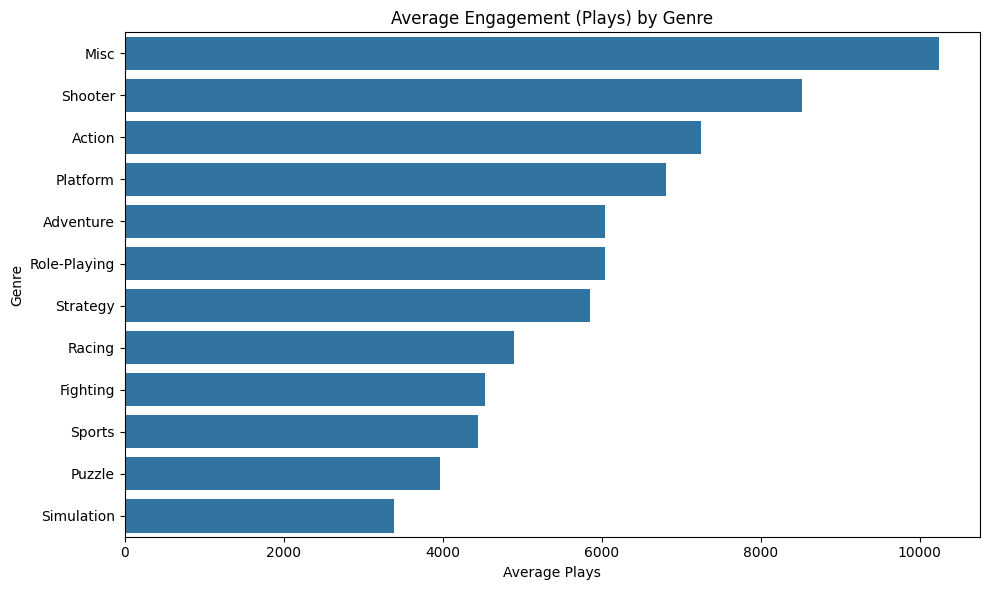

In [70]:
engagement_by_genre = df_merged.groupby('Genre')['Plays'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=engagement_by_genre.index, x=engagement_by_genre.values)
plt.title('Average Engagement (Plays) by Genre')
plt.xlabel('Average Plays')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 29. Top-performing combinations of Genre + Platform (by sales)


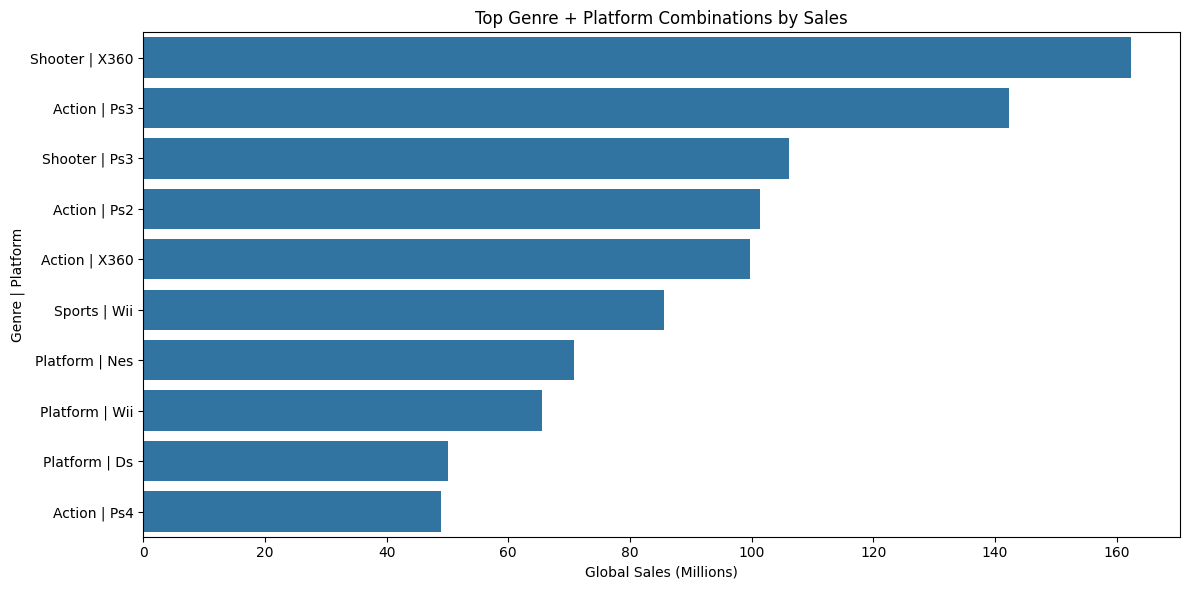

In [71]:
gen_plat_sales = df_merged.groupby(['Genre','Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
gen_plat_sales = gen_plat_sales.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Global_Sales', y=gen_plat_sales.apply(lambda x: f"{x['Genre']} | {x['Platform']}", axis=1), data=gen_plat_sales)
plt.title('Top Genre + Platform Combinations by Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Genre | Platform')
plt.tight_layout()
plt.show()

# 30. Regional sales heatmap by genre


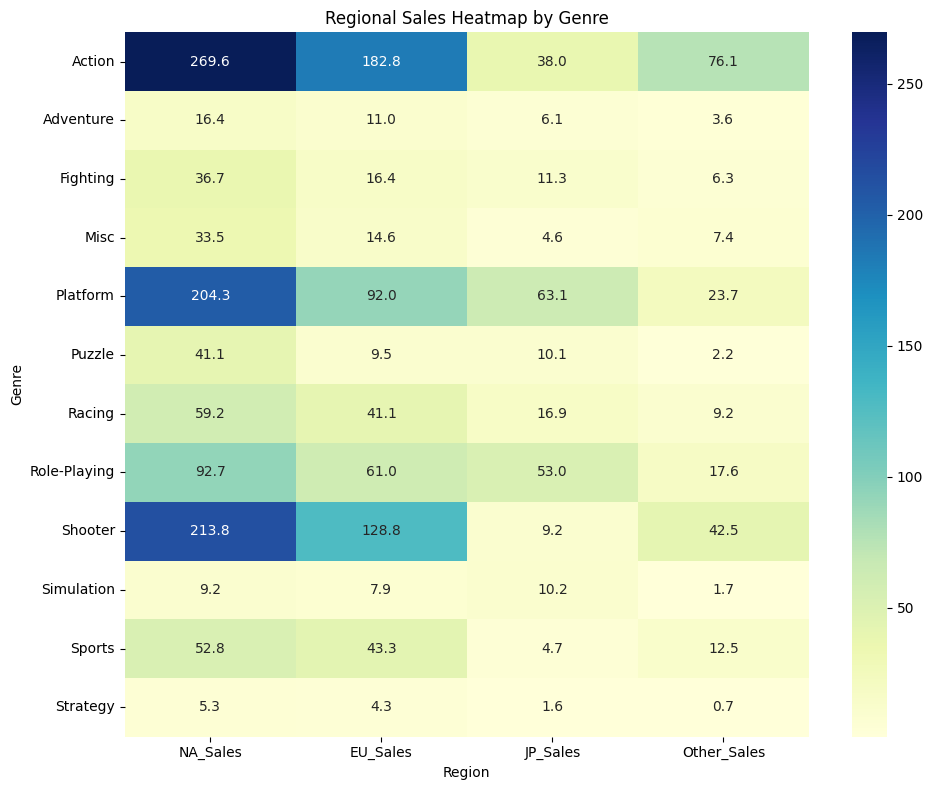

In [72]:
region_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
genre_region = df_merged.groupby('Genre')[region_cols].sum()
plt.figure(figsize=(10,8))
sns.heatmap(genre_region, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Regional Sales Heatmap by Genre')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Connectionn to mysql using msqlclient 

In [73]:
from decouple  import config
import MySQLdb
try:

    conn = MySQLdb.connect(
        host=config('DB_HOST'),
        user=config('DB_USER'),
        password=config('DB_PASSWORD'),
        autocommit=True
)
    print('connection establish')
except MySQLdb.Error as err:    
    print(f"❌ Unable to connect: {err}")


print(conn)
cursor=conn.cursor()



UndefinedValueError: DB_HOST not found. Declare it as envvar or define a default value.

In [ ]:
try:
    db_name = "eda_salesandgames"
    cursor.execute("SHOW DATABASES;")
    databases = [db[0] for db in cursor.fetchall()]

    if db_name in databases:
        print(f"⚠️ Database '{db_name}' already exists.")
    else:
        # Step 4️⃣: Create new DB
        cursor.execute(f"CREATE DATABASE {db_name};")
        print(f"✅ Database '{db_name}' created successfully!")

except MySQLdb.Error as err:
    print(f"❌ MySQL Error [{err.args[0]}]: {err.args[1]}")

✅ Database 'eda_salesandgames' created successfully!


In [ ]:

cursor.execute('use eda_salesandgames ')

0

In [ ]:
try:
    cursor.execute("""
    CREATE TABLE games (
    game_id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    release_date DATE NOT NULL,
    team VARCHAR(255),
    rating FLOAT,
    number_of_reviews INT,
    genres VARCHAR(255),
    summary TEXT,
    reviews TEXT,
    plays INT,
    playing INT,
    backlogs INT,
    wishlist INT,
    weighted_rating FLOAT
);""")


    cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    sales_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    platform VARCHAR(50),
    year INT,
    genre VARCHAR(100),
    publisher VARCHAR(100),
    na_sales FLOAT,
    eu_sales FLOAT,
    jp_sales FLOAT,
    other_sales FLOAT,
    global_sales FLOAT,
    game_id INT,
    FOREIGN KEY (game_id) REFERENCES games(game_id) 
        ON DELETE CASCADE
        ON UPDATE CASCADE
);""")
    cursor.execute("""
CREATE TABLE IF NOT EXISTS merged (
    merged_id INT AUTO_INCREMENT PRIMARY KEY,
    game_id INT,
    sales_id INT,
    rating FLOAT,
    plays INT,
    wishlist INT,
    backlogs INT,
    FOREIGN KEY (game_id) REFERENCES games(game_id)
        ON DELETE CASCADE
        ON UPDATE CASCADE,
    FOREIGN KEY (sales_id) REFERENCES sales(sales_id)
        ON DELETE CASCADE
        ON UPDATE CASCADE
);""")
except MySQLdb.Error as err:    
    print(f"❌ Unable to create: {err}")



In [ ]:
df_game.columns


Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist', 'weighted_rating', 'Backlog_Wishlist_Ratio',
       'Release_Year'],
      dtype='object')

In [ ]:
def insert_games(df, cursor, conn):
    query = """
        INSERT INTO games (
            title, release_date, team, rating, number_of_reviews, genres,
            summary, reviews, plays, playing, backlogs, wishlist,
            weighted_rating
        )
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    for idx, row in df.iterrows():
        try:
            cursor.execute(query, (
                row.get('Title'),
                row['Release Date'] if ('Release Date' in row and not pd.isna(row['Release Date'])) else None,
                row.get('Team'),
                float(row['Rating']) if ('Rating' in row and not pd.isna(row['Rating'])) else None,
                row.get('Number of Reviews'),
                row.get('Genres'),
                row.get('Summary'),
                str(row.get('Reviews')) if row.get('Reviews') is not None else None,
                row.get('Plays'),
                row.get('Playing'),
                row.get('Backlogs'),
                row.get('Wishlist'),
                row.get('weighted_rating'),
            ))
        except Exception as e:
            print(f"Error inserting row {idx}: {e}")
    conn.commit()
    print("Inserted games data (attempted).")

# Usage:
insert_games(df_game, cursor, conn)


Inserted games data (attempted).


In [ ]:
df_game.shape


(1083, 16)

In [ ]:

def insert_sales_data(df_sales):
    for i, row in df_sales.iterrows():
        try:
            # Get game_id from games table (based on name/title)
            cursor.execute("SELECT game_id FROM games WHERE title = %s", (row['Name'],))
            result = cursor.fetchone()

            if result:
                game_id = result[0]

                cursor.execute("""
                    INSERT INTO sales
                    (name, platform, year, genre, publisher, 
                     na_sales, eu_sales, jp_sales, other_sales, global_sales, game_id)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """, (
                    row['Name'], row['Platform'], row['Year'], row['Genre'], row['Publisher'],
                    row['NA_Sales'], row['EU_Sales'], row['JP_Sales'], row['Other_Sales'], row['Global_Sales'], game_id
                ))
                conn.commit()
            else:
                print(f"⚠️ Game not found for '{row['Name']}' — skipping this sale record.")
        except MySQLdb.Error as err:
            print(f"❌ Error inserting row {i}: {err}")
    print("✅ Sales data inserted successfully (attempted).")

In [ ]:
def insert_merged_data():
    try:
        cursor.execute("""
        INSERT INTO merged (game_id, sales_id, rating, plays, wishlist, backlogs)
        SELECT g.game_id, s.sales_id, g.rating, g.plays, g.wishlist, g.backlogs
        FROM games g
        JOIN sales s ON g.game_id = s.game_id
        """)
        conn.commit()
        print("✅ Merged data created successfully!")
    except MySQLdb.Error as err:
        print(f"❌ Error creating merged table entries: {err}")


In [ ]:
df_game.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,weighted_rating,Backlog_Wishlist_Ratio,Release_Year
0,0,elden ring,2022-02-25,"Bandai Namco Entertainment , FromSoftware",4.5,3900.0,"Adventure , Rpg","Elden Ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0,4.413173,0.958333,2022
1,1,hades,2019-12-10,Supergiant Games,4.3,2900.0,"Adventure , Brawler , Indie , Rpg",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0,4.213882,1.750000,2019
